## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np #linear algebra
import matplotlib.pyplot as plt #ploting the data
import seaborn as sns #ploting the data
import math # calculation
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

In [2]:
from google.colab import drive #connect with google drive
drive.mount('/content/drive')

Mounted at /content/drive


**To describe the data**

In [3]:
link = '/content/drive/MyDrive/project/Hotel Bookings.csv'
ht = pd.read_csv(link)

In [4]:
#show the dataset
ht

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
#know the name of each column
ht.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
ht['hotel'].value_counts().reset_index()

,index,hotel
0,City Hotel,79330
1,Resort Hotel,40060


In [7]:
#knowing the information of the data ponts in each column
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#finding the sum of null values in each column
ht.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#see the shape of the dataset
ht.shape

(119390, 32)

In [ ]:
ht.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#find the number of unique elements in adults column
ht['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

**Data Cleaning**

In [9]:
# Drop few columns which are not important
ht.drop(['adults', 'children', 'babies', 'meal','country', 'market_segment', 'distribution_channel','previous_cancellations', 'booking_changes', 'deposit_type', 'agent','company', 'days_in_waiting_list', 'customer_type', 'adr','required_car_parking_spaces', 'total_of_special_requests','reservation_status'], axis=1, inplace=True)

In [10]:
#see the updated column names
ht.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'is_repeated_guest',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'reservation_status_date'],
      dtype='object')

In [11]:
#CHECK HOW MUCH WE HAVE NULL DATA IN THE ROW DATA
ht.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
reservation_status_date           0
dtype: int64

In [ ]:
ht.head(5)

In [ ]:
#Remove the canceled bookings from the data
ht['new']=np.where(ht['is_canceled']==1, 'canceled', 'not canceled')

In [ ]:
ht['new'].unique()

array(['not canceled', 'canceled'], dtype=object)

In [ ]:
#Check how many bookings were canceled
hotel_canceled=ht.groupby('hotel')['new'].value_counts().unstack()
hotel_canceled

new,canceled,not canceled
hotel,,
City Hotel,33102,46228
Resort Hotel,11122,28938


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

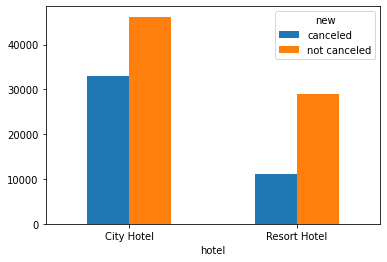

In [ ]:
# Plot for finding the number of bookings canceled in each hotel
hotel_canceled.plot(kind='bar')
plt.xlabel=('hotel')
plt.ylabel=('cancellation')
plt.title=('hotel cancellation')
plt.xticks(rotation='horizontal')

*   Checked the canceled bookings in each hotel
*   We found in city hotel "33102" bookings were canceled.
*   We found in resort hotel "11122" bookings were canceled.

In [ ]:
arrival_date=ht['arrival_date_day_of_month']

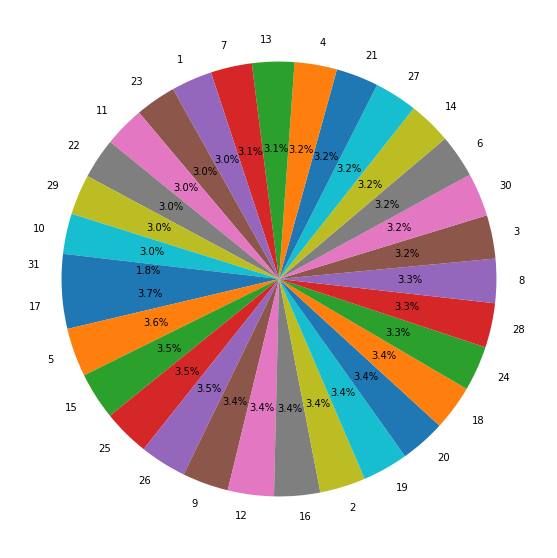

In [ ]:
#According to date we found that date did not depend on hotel booking
plt.figure(figsize=(10, 10))
plt.pie(arrival_date.value_counts(), labels=arrival_date.value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
hotel_not_canceled=ht[ht['new']!='canceled']

In [ ]:
arrival_day=ht['arrival_date_day_of_month'].value_counts()
arrival_day

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

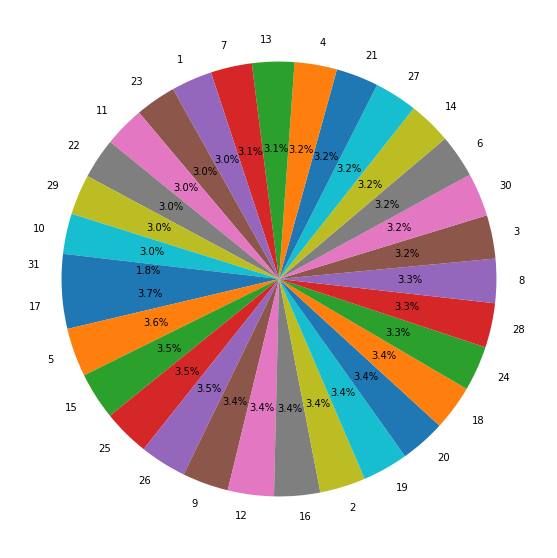

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(arrival_day, labels=arrival_day.index, autopct='%1.1f%%', startangle=180)
plt.show()

In [ ]:
#checking the count of bookings in each month
arrival_month=ht['arrival_date_month'].value_counts()
arrival_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

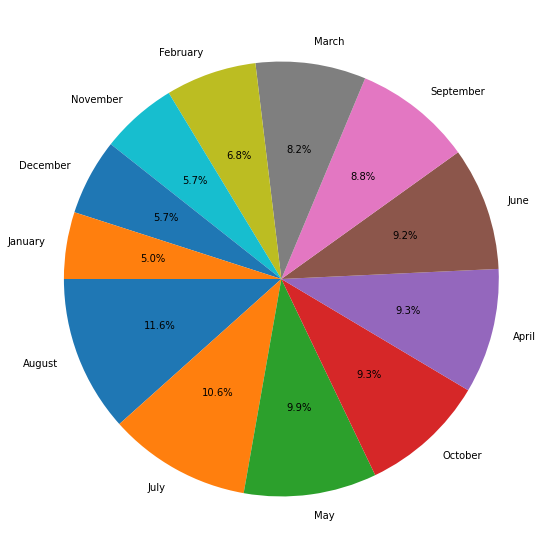

In [ ]:
#pie plot to show the percentage of bookings in each month
plt.figure(figsize=(10,10))
plt.pie(arrival_month, labels=arrival_month.index, autopct='%1.1f%%', startangle=180)
plt.show()

****DATA AFTER REMOVING ALL CANCELED BOOKINGS****

* we found that "august" is the most visited month and 
* "July" is the second most visited month.




In [ ]:
# finding the week of the month
def week_in_month(a):

  if a<=21:
    c=3
    if a<=14:
      c=2
      if a<=7:
        c=1
  else:
    c=4
  return c
  


In [ ]:
week_in_month(10)

2

In [ ]:
#put a column of week of month
ht['week_num']=ht['arrival_date_day_of_month'].map(week_in_month)


In [ ]:
#check week wise data in both hotels.
weeks=ht.groupby('hotel')['week_num'].value_counts().unstack()
weeks

week_num,1,2,3,4
hotel,,,,
City Hotel,17947,17800,19311,24272
Resort Hotel,9167,9042,9222,12629


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

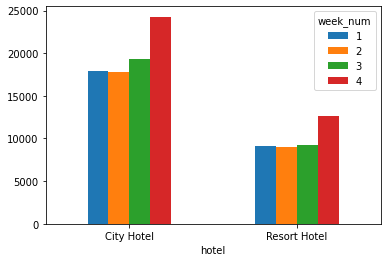

In [ ]:
#check which week have most bookings 
weeks.plot(kind='bar')
plt.xticks(rotation='horizontal')

##Lets understand which week is busiest using the pie chart

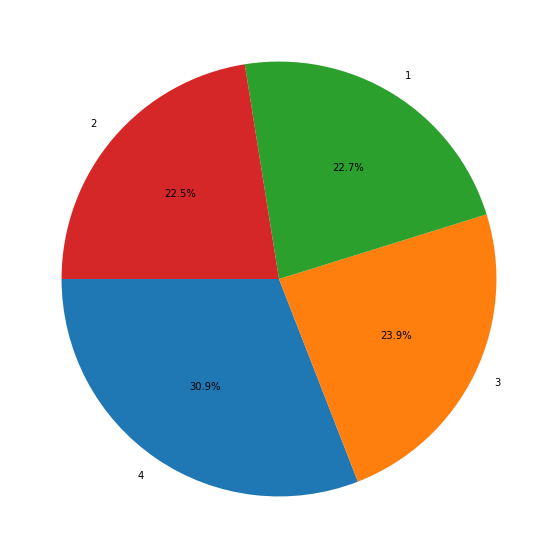

In [ ]:
#pie plot to show percentage of bookings in each week
plt.figure(figsize=(10,10))
plt.pie(ht.week_num.value_counts(), labels=ht.week_num.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

#Data for both hotels

*   According to graph we found that most number of customers visit the hotel   in fourth week of the month
*   We also found that less customers visit in second week of the month




Now, the question is we know august is the most busy month so check, which week is the most busy in both hotels

In [ ]:
ht.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1


In [ ]:
# now we filter the data only for august
august = ht[ht['arrival_date_month']== 'August']
august

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
842,Resort Hotel,0,129,2015,August,31,1,1,1,0,0,A,A,2015-08-03,not canceled,1
843,Resort Hotel,1,84,2015,August,31,1,2,1,0,0,A,A,2015-05-12,canceled,1
844,Resort Hotel,1,84,2015,August,31,1,2,1,0,0,A,A,2015-05-12,canceled,1
845,Resort Hotel,1,89,2015,August,31,1,0,1,0,0,D,D,2015-05-04,canceled,1
846,Resort Hotel,1,10,2015,August,31,1,0,1,0,0,F,F,2015-07-29,canceled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,0,0,A,A,2017-09-06,not canceled,4
119386,City Hotel,0,102,2017,August,35,31,2,5,0,0,E,E,2017-09-07,not canceled,4
119387,City Hotel,0,34,2017,August,35,31,2,5,0,0,D,D,2017-09-07,not canceled,4
119388,City Hotel,0,109,2017,August,35,31,2,5,0,0,A,A,2017-09-07,not canceled,4


In [ ]:
#check data in august for both hotels
august['week_number'] = august['arrival_date_day_of_month'].map(week_in_month)
august.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num,week_number
842,Resort Hotel,0,129,2015,August,31,1,1,1,0,0,A,A,2015-08-03,not canceled,1,1
843,Resort Hotel,1,84,2015,August,31,1,2,1,0,0,A,A,2015-05-12,canceled,1,1


In [ ]:
#check data in august for both hotels
busy_week=august.groupby('hotel')['week_number'].value_counts().unstack()
busy_week

week_number,1,2,3,4
hotel,,,,
City Hotel,1889,2339,2133,2622
Resort Hotel,1155,1085,1154,1500


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

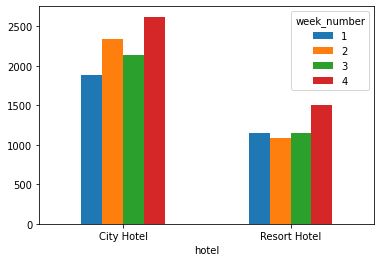

In [ ]:
#check which week have most bookings 
busy_week.plot(kind='bar')
plt.xticks(rotation='horizontal')

**AUGUST**

*   According to graph we found most customers visit in fourth week of month
* we found less customers visit in first week of mounth

#Now the question is what type room we give to customers

In [ ]:
#count the number of reserved room type for different room types 
ht['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
#what type of rooms we give to custumers
room_type=ht.groupby('hotel')['reserved_room_type'].value_counts().unstack()
room_type

reserved_room_type,A,B,C,D,E,F,G,H,L,P
hotel,,,,,,,,,,
City Hotel,62595.0,1115.0,14.0,11768.0,1553.0,1791.0,484.0,NaN,NaN,10.0
Resort Hotel,23399.0,3.0,918.0,7433.0,4982.0,1106.0,1610.0,601.0,6.0,2.0


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

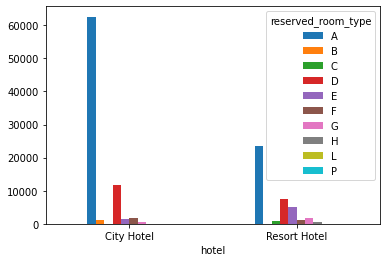

In [ ]:
# try to understand the data with the help of chart
room_type.plot(kind='bar')
plt.xticks(rotation='horizontal')

*   We found we assigned most customers "A" types of rooms.
*   Secondary we assigned "D" types of rooms.'

In [ ]:
ht.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1


**Now the question is which type of room type custOmer want**

In [12]:
#what type of rooms custumers want
assigned_type_room1 = ht.groupby(['hotel'])['reserved_room_type'].value_counts().unstack()
assigned_type_room1.fillna(0,inplace=True) 
assigned_type_room1

reserved_room_type,A,B,C,D,E,F,G,H,L,P
hotel,,,,,,,,,,
City Hotel,62595.0,1115.0,14.0,11768.0,1553.0,1791.0,484.0,0.0,0.0,10.0
Resort Hotel,23399.0,3.0,918.0,7433.0,4982.0,1106.0,1610.0,601.0,6.0,2.0


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

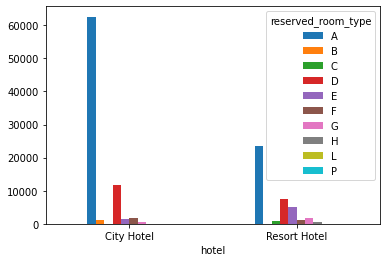

In [13]:
# try to understand the data with the help of chart
assigned_type_room1.plot(kind='bar')
plt.xticks(rotation ='horizontal')


*   We found customers want to stay in "A" type of rooms
*   Secondry customer want to stay "D" type of rooms.

#Now the question is, to how many custumers are, we full-fill there room type need

In [ ]:
ht.head(2)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1


In [ ]:
#check the data for resort hotels
resort_hotel = ht[ht['hotel']=='Resort Hotel']
resort_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,0,0,A,C,2015-07-02,not canceled,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,0,0,A,A,2015-07-02,not canceled,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,0,0,A,A,2015-07-03,not canceled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,0,0,A,A,2017-09-10,not canceled,4
40056,Resort Hotel,0,169,2017,August,35,30,2,9,0,0,E,E,2017-09-10,not canceled,4
40057,Resort Hotel,0,204,2017,August,35,29,4,10,0,0,E,E,2017-09-12,not canceled,4
40058,Resort Hotel,0,211,2017,August,35,31,4,10,0,0,D,D,2017-09-14,not canceled,4


In [ ]:
# check the count of room not assigened and assigned
same_room_type_assigned= (resort_hotel['reserved_room_type']==resort_hotel['assigned_room_type']).sum()
same_room_type_assigned
same_room_type_not_assigned= (resort_hotel['reserved_room_type']!=resort_hotel['assigned_room_type']).sum()
same_room_type_not_assigned

7725

In [ ]:
#let's convert it into dataframe
dict= {'same room assigned':same_room_type_assigned, 'same room not assigned':same_room_type_not_assigned }
new=pd.DataFrame(data=dict, index=[0])
new.set_axis(['resort hotel'], inplace=True)
new

,same room assigned,same room not assigned
resort hotel,32335,7725


(array([0]), <a list of 1 Text major ticklabel objects>)

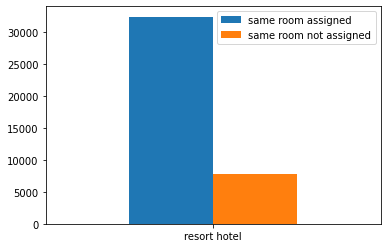

In [ ]:
# try to understand the data with the help of chart
new.plot(kind='bar')
plt.xticks(rotation='horizontal')

*   In resort hotel we found 32335 bookings are assigned the same rooms 
*   In resort hotel we found 7725 bookings are not assigned the same rooms 

**City Hotel**



In [ ]:
#check the data for city hotels
city_hotel = ht[ht['hotel']=='City Hotel']
city_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
40060,City Hotel,0,6,2015,July,27,1,0,2,0,0,A,A,2015-07-03,not canceled,1
40061,City Hotel,1,88,2015,July,27,1,0,4,0,0,A,A,2015-07-01,canceled,1
40062,City Hotel,1,65,2015,July,27,1,0,4,0,0,A,A,2015-04-30,canceled,1
40063,City Hotel,1,92,2015,July,27,1,2,4,0,0,A,A,2015-06-23,canceled,1
40064,City Hotel,1,100,2015,July,27,2,0,2,0,0,A,A,2015-04-02,canceled,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,0,0,A,A,2017-09-06,not canceled,4
119386,City Hotel,0,102,2017,August,35,31,2,5,0,0,E,E,2017-09-07,not canceled,4
119387,City Hotel,0,34,2017,August,35,31,2,5,0,0,D,D,2017-09-07,not canceled,4
119388,City Hotel,0,109,2017,August,35,31,2,5,0,0,A,A,2017-09-07,not canceled,4


In [ ]:
# check the count of room not assigened and assigned
same_room_type_assigned1= (city_hotel['reserved_room_type']==city_hotel['assigned_room_type']).sum()
same_room_type_assigned1
same_room_type_not_assigned1= (city_hotel['reserved_room_type']!=city_hotel['assigned_room_type']).sum()
same_room_type_not_assigned1

7192

In [ ]:
#let's convert it into dataframe
dict= {'same room assigned':same_room_type_assigned1, 'same room not assigned':same_room_type_not_assigned1 }
new=pd.DataFrame(data=dict, index=[0])
new.set_axis(['city hotel'], inplace=True)
new

,same room assigned,same room not assigned
city hotel,72138,7192


(array([0]), <a list of 1 Text major ticklabel objects>)

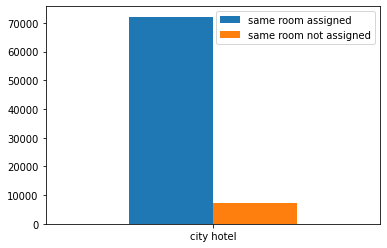

In [ ]:
# try to understand the data with the help of chart
new.plot(kind='bar')
plt.xticks(rotation='horizontal')

*   City hotel hotel we found 72138 bookings are assigned the same rooms 
*   City hotel hotel we found 7192 bookings are not assigned the same rooms 

**Now the question is let's check the time and find which time is good for booking**

In [ ]:
ht.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1


In [ ]:
#let's define a class to convert lead_time to actual time
def gettime(time):
  c=time/60
  d=int(c)
  d
  return d

In [ ]:
#apply function
ht['new_time']=ht['lead_time'].map(gettime)

In [ ]:
ht.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,reservation_status_date,new,week_num,new_time
0,Resort Hotel,0,342,2015,July,27,1,0,0,0,0,C,C,2015-07-01,not canceled,1,5


In [ ]:
#see the actual values
Good_time_for_booking=ht.groupby('hotel')['new_time'].value_counts().unstack()
Good_time_for_booking

new_time,0,1,2,3,4,5,6,7,8,9,10,11,12
hotel,,,,,,,,,,,,,
City Hotel,34954.0,16464.0,10762.0,6191.0,4677.0,3397.0,1348.0,1012.0,244.0,136.0,145.0,NaN,NaN
Resort Hotel,20286.0,6737.0,5225.0,3904.0,2210.0,1140.0,446.0,86.0,1.0,23.0,NaN,1.0,1.0


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 2376x1296 with 0 Axes>

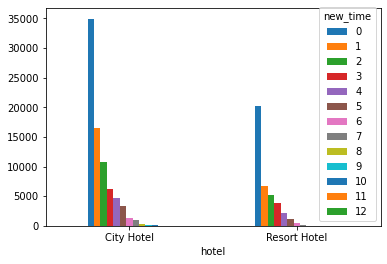

In [ ]:
#try to understanding it by using graph
plt.figure(figsize=(33,18))
Good_time_for_booking.plot(kind='bar')
plt.xticks(rotation='horizontal')



* According to the previous gragh we found that when the time is 0 means 12-1 o'clock bookings are too much 
* City hotel have no bookings at 9,11,12 o'clock
* resort hotel is also have week bookings at 9,11,12 o'clock




###we have another question find is it correct? bookings are canceled due to not same type room which customer want

In [ ]:
#cancelled data
hotel_cancellation=ht[ht['new']=='canceled']
hotel_cancellation

In [ ]:
#check the data for city hotels
hotel_city2=hotel_cancellation[hotel_cancellation['hotel']=='City Hotel']
hotel_city2
#check the count of room not assigened
same_room_not_assigened2=(hotel_city2['reserved_room_type']!=hotel_city2['assigned_room_type']).sum()
same_room_not_assigened2
same_room_assigened2=(hotel_city2['reserved_room_type']==hotel_city2['assigned_room_type']).sum()
same_room_assigened2

32684

In [ ]:
#convert into dataframe
data1={'same room not assigned':same_room_not_assigened2, 'same room assigned':same_room_assigened2}
cancellation=pd.DataFrame(data1, index=[0])
cancellation.set_axis(['Resort Hotel'], inplace=True)
cancellation

,same room not assigned,same room assigned
Resort Hotel,418,32684


(array([0]), <a list of 1 Text major ticklabel objects>)

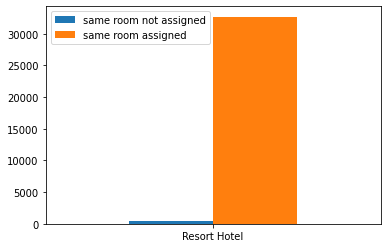

In [ ]:
#bar plot
cancellation.plot(kind='bar')
plt.xticks(rotation='horizontal')

*   According to data we found only 418 bookings were canceled which are not same type of room
*   According to data we found only 32684 bookings were canceled which same type of room
*   So, i think diffrent types rooms are not impacting on canceled bookings.

Resort Hotel

In [ ]:
#check the data for city hotels
resort_hotel2=hotel_cancellation[hotel_cancellation['hotel']=='Resort Hotel']
resort_hotel2
#check the count of room not assigened
same_room_not_assigned3=(resort_hotel2['reserved_room_type']!=resort_hotel2['assigned_room_type']).sum()
same_room_not_assigned3
same_room_assigned3=(resort_hotel2['reserved_room_type']==resort_hotel2['assigned_room_type']).sum()
same_room_assigned3

10738

In [ ]:
#let's convert it into dataframe

data2= {'same room not assigned': same_room_not_assigned3,
        'same room assigened': same_room_assigned3} 
new = pd.DataFrame(data2, index=[0])
new.set_axis(['Resort Hotel'], inplace=True)
new

,same room not assigned,same room assigened
Resort Hotel,384,10738


(array([0]), <a list of 1 Text major ticklabel objects>)

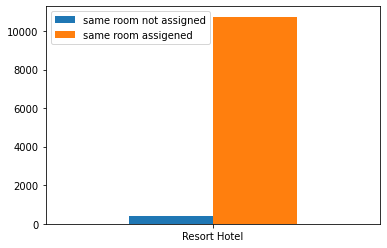

In [ ]:
new.plot(kind='bar')
plt.xticks(rotation='horizontal')


*   According to data we found only 384	 bookings were canceled which are not same type of room
*   According to data we found only 10738 bookings were canceled which same type of room
*   So, i think diffrent types rooms are not impacting on canceled bookings.

# Insites of the project


1.   WE FOUND IN **CITY HOTEL "33102"** BOOKINGS WERE **canceled**. and WE FOUND IN **Resort Hotel "11122"** BOOKINGS WERE **canceled.**
2. we found **"august"** is **most visited** mounth and **"July"** is the **second most visited** month.
3.  We found **most customers** visit in **fourth week** of month, 
We found **less customers** visit in **first week** of month.
3. Customers want to stay in **"A" and "D"** type of rooms.
4. In **resort hotel** we found **7341** bookings are **not assigned** the **same rooms**
5. IN **City hotel** hotel we found **6774** bookings are **not assigned** **the same rooms**
2.   **Diffrent types rooms** are not **impacting** on **cancellation** of the bookings.
